# Exploratory Data Analysis 
-----
This is the EDA notebook for Project 4 of GA Data Science Immersive.
Project by: <br>
Andres Aguilar <br>
Martijn de Vries <br>
William Lopez

This notebook cotains:
- [Data Cleaning](#Data-Cleaning)
- [EDA](#EDA)
- [Time Series EDA](#Time-Series-EDA)
- [Feature Engineering](#Feature-Engineering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
#set a global random seed
np.random.seed(42)

Let's start by importing the combined dataset

In [2]:
df = pd.read_csv('../data/NSRDB_data.csv', index_col='datetime', parse_dates=True)
print(df.shape)
df.head()

(87696, 22)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,1,1,0,0,5.0,0,0,0,0,...,0,0,0,49.00,168.95,0.128,990,0.472,55.7,4.0
2016-01-01 00:30:00,2016,1,1,0,30,5.0,0,0,0,0,...,0,0,0,49.00,166.74,0.128,990,0.477,55.7,4.0
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0,0,0,48.97,162.23,0.128,990,0.482,55.7,4.1
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0,0,0,48.97,156.74,0.128,990,0.489,55.7,4.1
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0,0,0,48.98,150.83,0.128,990,0.496,56.0,4.2


## Data Cleaning

In [3]:
# Checking for null values 
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
Fill Flag             0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,87696.0,2018.000000,1.414995,2016.000,2017.000,2018.000,2019.000,2020.000
Month,87696.0,6.521073,3.449232,1.000,4.000,7.000,10.000,12.000
Day,87696.0,15.735085,8.802441,1.000,8.000,16.000,23.000,31.000
Hour,87696.0,11.500000,6.922226,0.000,5.750,11.500,17.250,23.000
Minute,87696.0,15.000000,15.000086,0.000,0.000,15.000,30.000,30.000
Temperature,87696.0,18.502992,6.524041,2.000,13.500,17.900,23.000,42.500
Clearsky DHI,87696.0,46.813435,55.560772,0.000,0.000,7.000,92.000,410.000
Clearsky DNI,87696.0,354.210226,390.439956,0.000,0.000,34.000,795.000,1010.000
Clearsky GHI,87696.0,257.305464,332.676406,0.000,0.000,7.000,532.000,1075.000
Cloud Type,87696.0,1.689359,2.639331,0.000,0.000,0.000,3.000,9.000


The dataset appears to be clean with no missing values, and no strange observable outliers

## EDA

Which features are most predictive for present-day GHI?

In [5]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [6]:
features = ['Wind Speed', 'Wind Direction', 'Dew Point', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Temperature', 'Solar Zenith Angle', 'GHI']

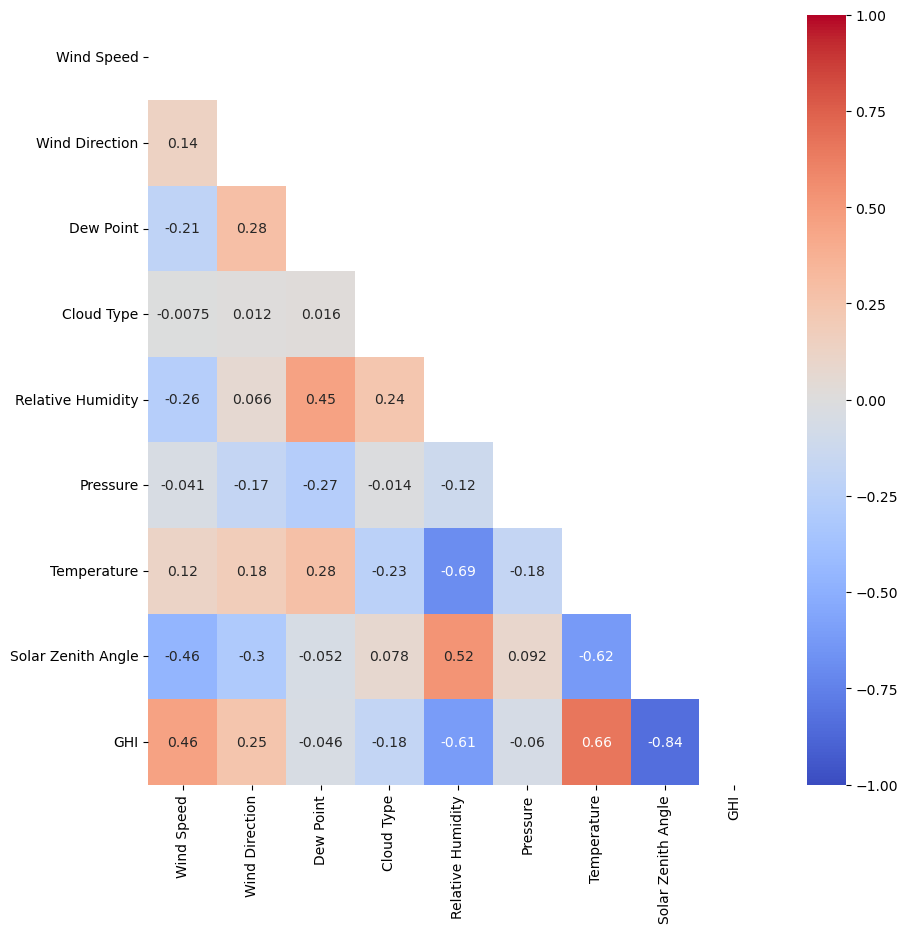

In [7]:
corr = df[features].corr()
mask = np.zeros(corr.shape)
mask[np.triu_indices_from(corr)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
plt.savefig('../figures/corr_heatmap.png')

We would like to look at how clouds affect the GHI. Clouds can obvipusly be quite important in predicting how much sun is received.

Note: Cloud Type is actually a labeled categorical variable, although there seems to be some ordinality to it in that a higher cloud type means more sun is blocked.

The labels corresponds to the following cloud types:<br>
0: Clear <br>
1: Probably Clear <br>
2: Fog<br>
3: Water<br>
4: Super-Cooled Water<br>
5: Mixed<br>
6: Opaque<br>
7: Cirrus<br>
8: Overlapping<br>
9: Overshooting<br>
10: Unknown<br>
11: Dust<br>
12: Smoke

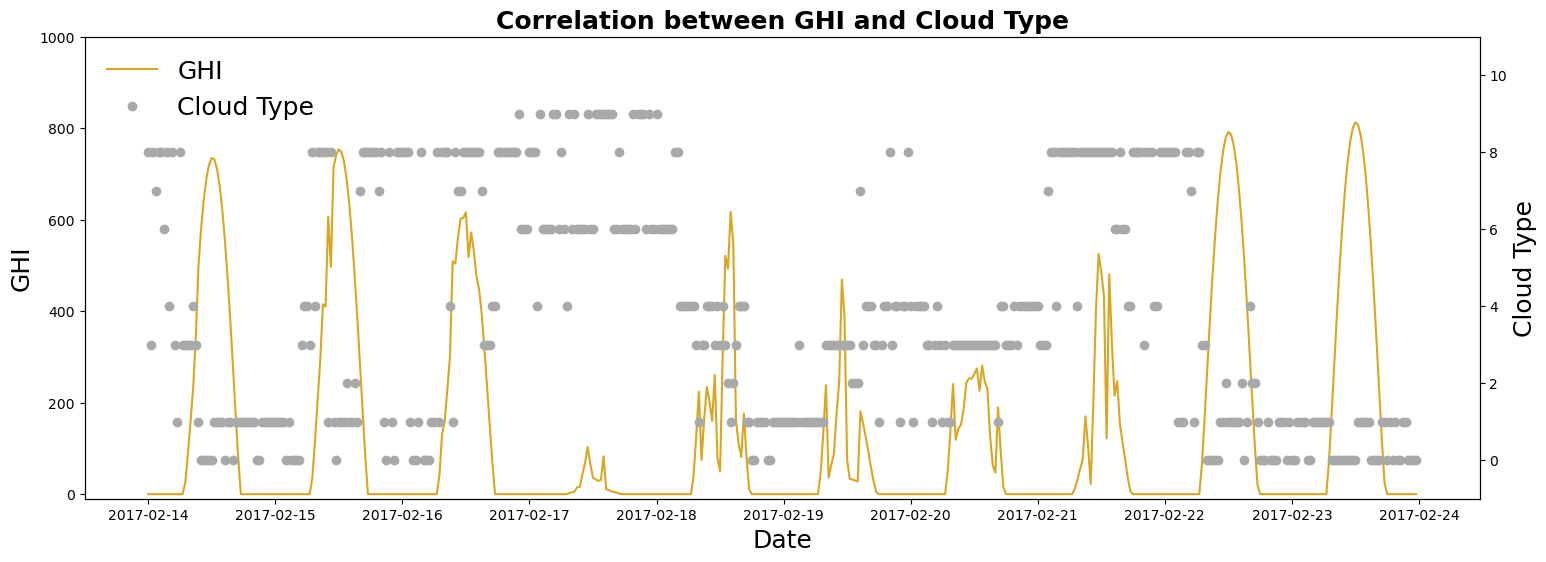

In [10]:
GHI = df['GHI']

#picking a few random days with clouds
i = 410
nd = 10
fig, ax1 = plt.subplots( figsize=(18, 6))
ax1.plot(GHI[i*48:(i+nd)*48], label='GHI', color='goldenrod')
ax1.plot([], marker='o', color='darkgrey', linestyle='None', label='Cloud Type') #dummy to get everything on one legend
ax1.set_ylabel('GHI', fontsize=18)
ax1.set_ylim(-10, 1000)
ax1.set_xlabel('Date', fontsize=18)
ax1.legend(frameon=False, fontsize=18, loc='upper left')
ax_c =ax1.twinx()

ax_c.plot(df['Cloud Type'][i*48:(i+nd)*48], linestyle='None', marker='o', color='darkgrey')
ax_c.set_ylabel('Cloud Type', fontsize=18)
ax_c.set_ylim(-1, 11)
ax1.set_title('Correlation between GHI and Cloud Type', fontsize=18, fontweight='bold')
fig.savefig('../figures/GHI_cloudtype.png')
plt.show()

This seems to indicate that cloud type is important when predicting the GHI, which makes  intuitive sense - clouds will be the main reason as to why there is less sunshine than predicted on a given day.

## Time Series EDA

How does the average GHI evolve throughout the full 5 years of the dataset?

In [42]:
def calc_daily_mean(input_arr):
    ml = []
    for i in range(0, len(input_arr), 48):
        ml.append(np.mean(input_arr[i:i+48]))
    return np.array(ml)

In [43]:
mean_GHI = calc_daily_mean(df['GHI'])
dates = df.index[::48] #just the days

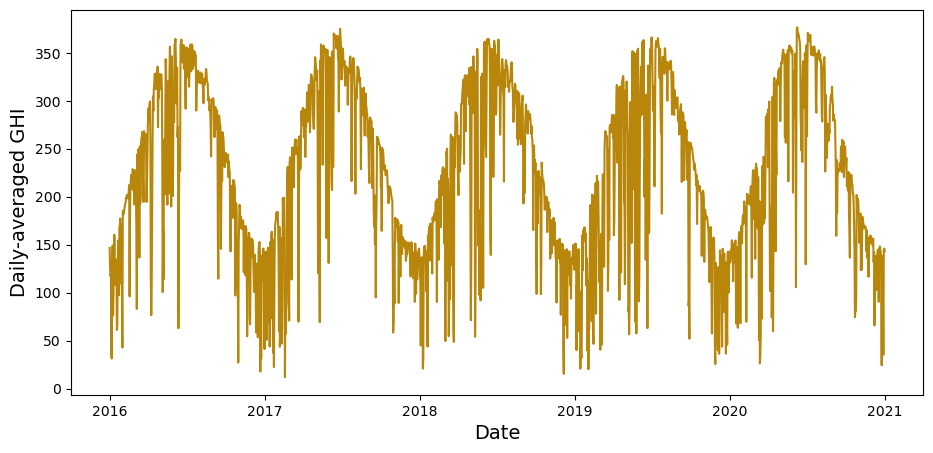

In [44]:
plt.figure(figsize=(11, 5))
plt.plot(dates,mean_GHI, color='darkgoldenrod')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily-averaged GHI', fontsize=14)
plt.show()

From the plotting of the GHI we can see that there is yearly seasonality to to the values. However the overall long-term trend appears to be stable (at least for this relatively short range of years - climate change means that over the long run there will of course be an upward trend).

We will also plot the year seasonal decomposition to investigate monthly seasonality.

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

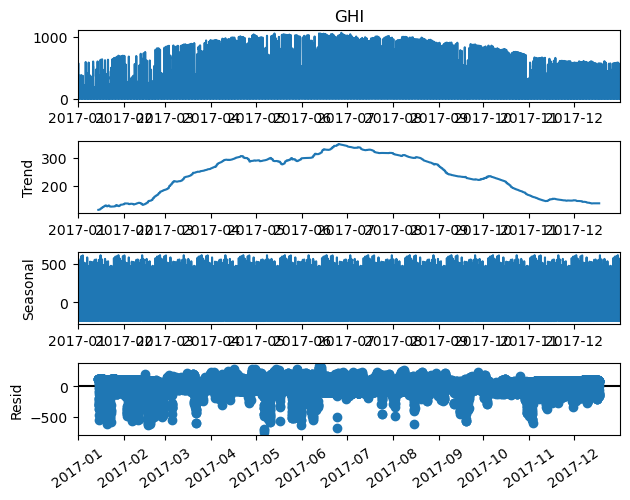

In [46]:
df_2017 = df.loc['2017']
decomp = seasonal_decompose(df_2017['GHI'], period = 48*7*4)

# Plot the decomposed time series.
fig = decomp.plot()

plt.xticks(rotation=35);

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

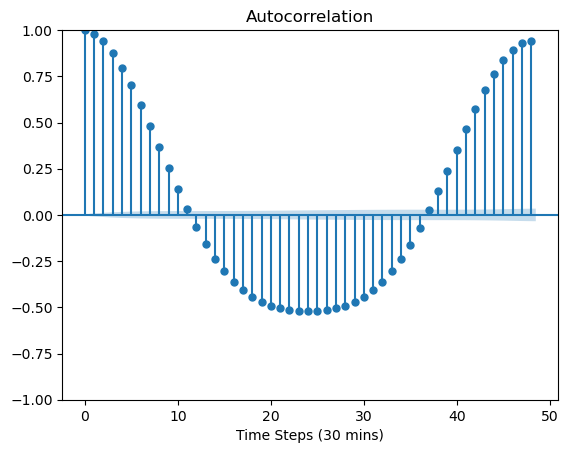

In [48]:
plot_acf(df['GHI'], lags=48)
plt.xlabel('Time Steps (30 mins)');

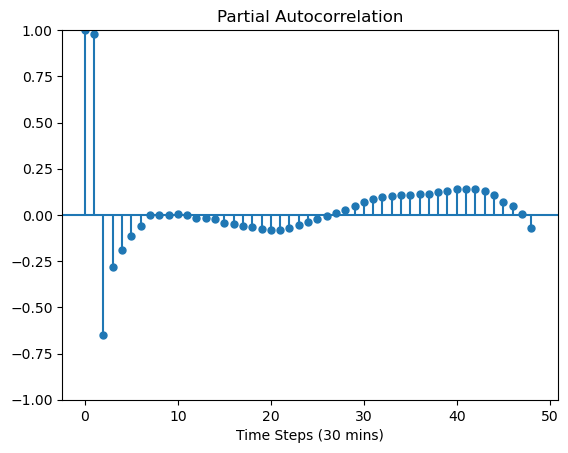

In [49]:
plot_pacf(df['GHI'], lags=48, method='ywm');
plt.xlabel('Time Steps (30 mins)');

From the Autocorrelation and Partial Autocorrelation, we can see that there is strong correlation for GHI between all hours of the day, especially from the 2 most recent hours. 

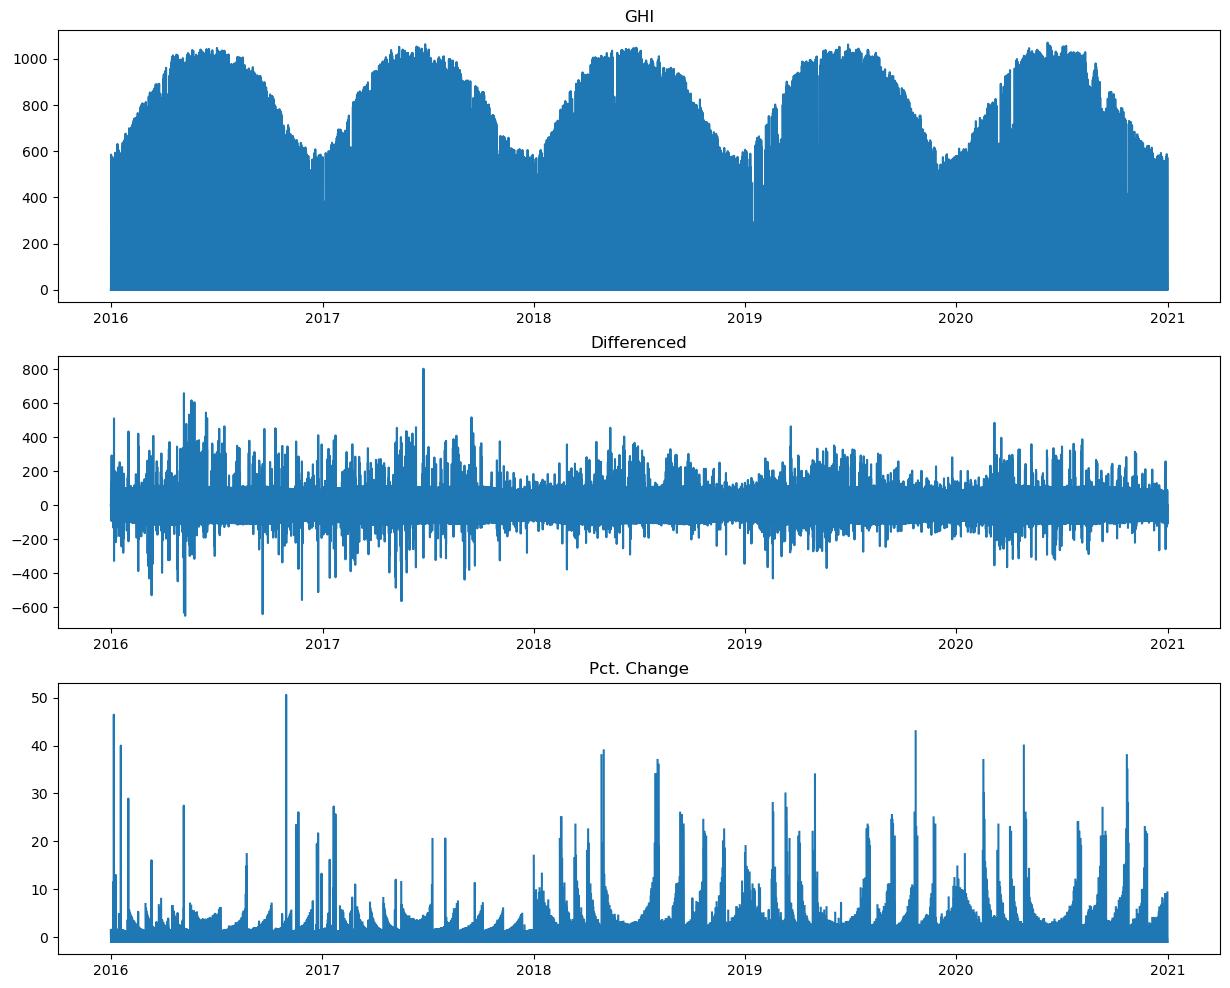

In [50]:
# Changes in data on entier dataset
fig, axes = plt.subplots(3, 1, figsize=(15,12))

axes[0].plot(df['GHI'])
axes[1].plot(df.diff()['GHI'])
axes[2].plot(df.pct_change()['GHI'])

axes[0].title.set_text('GHI')
axes[1].title.set_text('Differenced')
axes[2].title.set_text('Pct. Change');

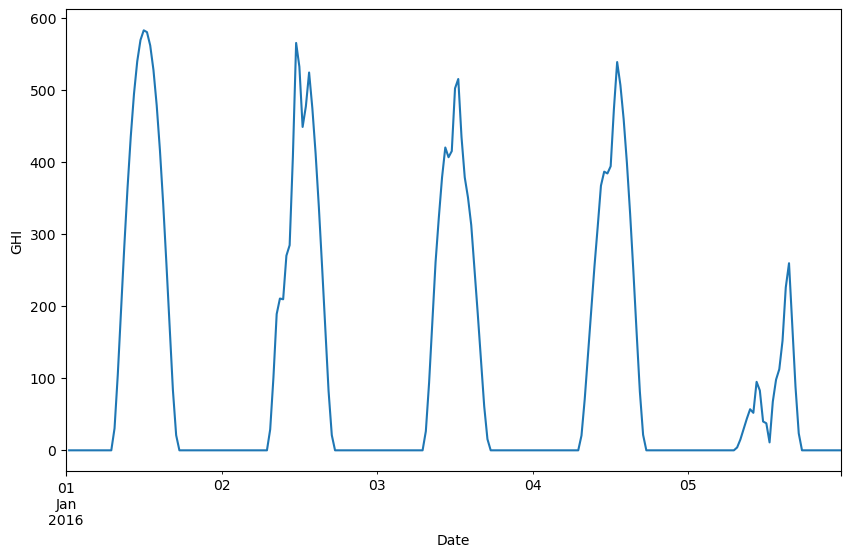

In [51]:
# Hourly rolling average of GHI across 5 days
df_day = df.iloc[0:240, :].copy()
df_day['moving_avg'] = df_day['GHI'].rolling(window=2).mean()
df_day['moving_avg'].plot(figsize=(10,6));
plt.xlabel('Date')
plt.ylabel('GHI');

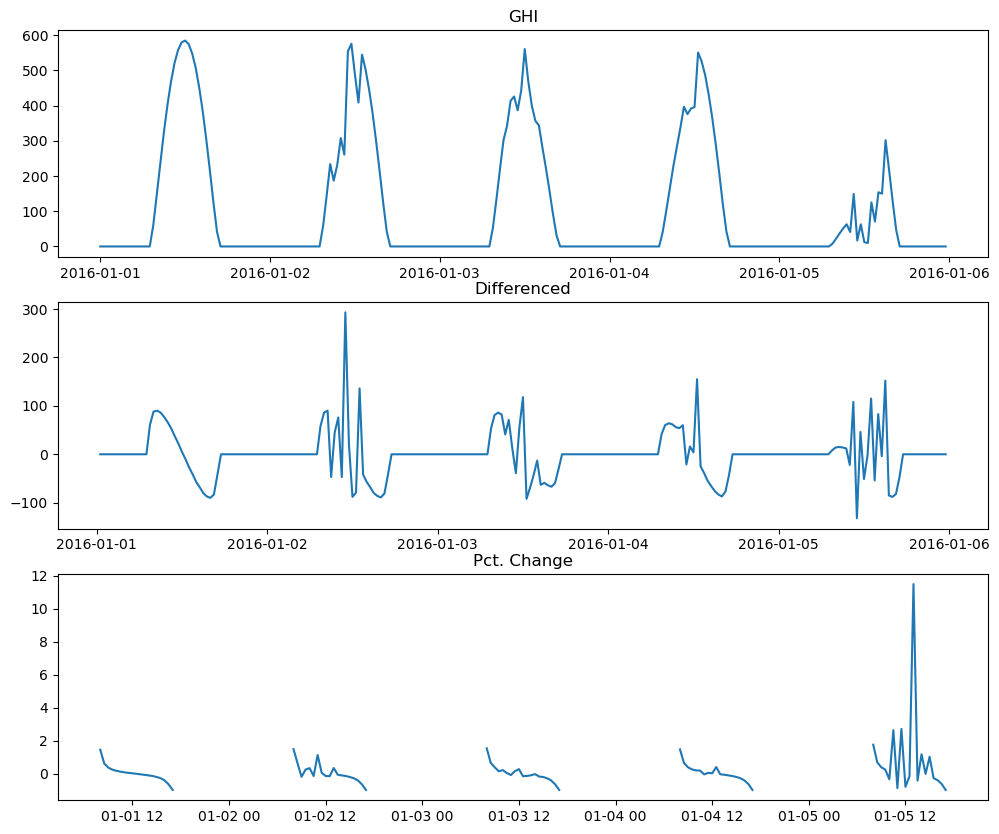

In [52]:
# Differences in GHI in 5 day span
fig, axes = plt.subplots(3, 1, figsize=(12,10))

axes[0].plot(df_day['GHI'])
axes[1].plot(df_day.diff()['GHI'])
axes[2].plot(df_day.pct_change()['GHI'])

axes[0].title.set_text('GHI')
axes[1].title.set_text('Differenced')
axes[2].title.set_text('Pct. Change');

The use of *pct_change()* would result in errors as seen from the 5 day span

## Feature Engineering

The timestep difference of the features and target can be used for smoother modeling so we will include them in the dataframe

In [54]:
df_difference = df.diff()

df = df.join(df_difference, how='left', rsuffix=' Difference')

#Would have to drop first time step to remove NaNs
df.dropna()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI Difference Difference,Fill Flag Difference Difference,GHI Difference Difference,Relative Humidity Difference Difference,Solar Zenith Angle Difference Difference,Surface Albedo Difference Difference,Pressure Difference Difference,Precipitable Water Difference Difference,Wind Direction Difference Difference,Wind Speed Difference Difference
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0.0,0.0,0.0,-0.03,-2.30,0.0,0.0,0.000,0.0,0.1
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0.0,0.0,0.0,0.03,-0.98,0.0,0.0,0.002,0.0,-0.1
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0.0,0.0,0.0,0.01,-0.42,0.0,0.0,0.000,0.3,0.1
2016-01-01 02:30:00,2016,1,1,2,30,5.0,0,0,0,0,...,0.0,0.0,0.0,-0.02,-0.19,0.0,0.0,0.000,-0.3,-0.1
2016-01-01 03:00:00,2016,1,1,3,0,5.0,0,0,0,0,...,0.0,0.0,0.0,0.33,-0.08,0.0,0.0,0.001,-0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,2020,12,31,21,30,9.8,0,0,0,0,...,0.0,0.0,0.0,2.16,-0.04,0.0,-1.0,0.000,-1.0,0.1
2020-12-31 22:00:00,2020,12,31,22,0,9.6,0,0,0,0,...,0.0,0.0,0.0,-3.46,-0.11,0.0,0.0,0.000,0.0,-0.1
2020-12-31 22:30:00,2020,12,31,22,30,9.4,0,0,0,0,...,0.0,0.0,0.0,3.37,-0.22,0.0,-1.0,0.000,0.0,0.1


From the data analysis, we can see that there is seasonality on an yearly and daily basis for our target variable of GHI. We will introduce two features to mimic this seasonality that can be used in modeling. 

In [55]:
timestamp_s = pd.to_datetime(df.index).map(pd.Timestamp.timestamp) #get second timestamp

day = 24*60*60
year = (365.2425)*day

# Use sine function to mimic daily and seasonal trends
df['Day Seasonality'] =  np.sin(timestamp_s * (2 * np.pi / day))
df['Year Seasonality'] =  np.sin(timestamp_s * (2 * np.pi / year))

In [56]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI Difference Difference,Relative Humidity Difference Difference,Solar Zenith Angle Difference Difference,Surface Albedo Difference Difference,Pressure Difference Difference,Precipitable Water Difference Difference,Wind Direction Difference Difference,Wind Speed Difference Difference,Day Seasonality,Year Seasonality
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,1,1,0,0,5.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.407890e-12,-0.002666
2016-01-01 00:30:00,2016,1,1,0,30,5.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.305262e-01,-0.002308
2016-01-01 01:00:00,2016,1,1,1,0,5.0,0,0,0,0,...,0.0,-0.03,-2.30,0.0,0.0,0.000,0.0,0.1,2.588190e-01,-0.001950
2016-01-01 01:30:00,2016,1,1,1,30,5.0,0,0,0,0,...,0.0,0.03,-0.98,0.0,0.0,0.002,0.0,-0.1,3.826834e-01,-0.001591
2016-01-01 02:00:00,2016,1,1,2,0,5.0,0,0,0,0,...,0.0,0.01,-0.42,0.0,0.0,0.000,0.3,0.1,5.000000e-01,-0.001233


Rather than use 'Wind speed' and 'Wind Direction', we will vectorize the wind parameters into an x and y direction. This way the model can understand that a wind direction of 360 degrees is very similar to a wind direction of 5 degrees.

(Idea from: https://www.tensorflow.org/tutorials/structured_data/time_series)

In [57]:
def decompose_xy(speed, angle):
    """
    Decomposes a feature angle + speed in degrees into an x and y component
    """
    angle_rad = angle * np.pi / 180
    
    # Calculate the wind x and y components.
    fx = angle_rad * np.cos(speed)
    fy = angle_rad * np.sin(speed)

    return fx, fy

In [58]:
df['Wind_x'], df['Wind_y'] = decompose_xy(df['Wind Speed'], df['Wind Direction'])

Finally, let's check that the standard-scaled distributions of the data look reasonable ((Idea from: https://www.tensorflow.org/tutorials/structured_data/time_series)

In [59]:
numerical_features = ['Wind_x', 'Wind_y', 'Dew Point','Day Seasonality', 'Year Seasonality', 'Pressure', 'Relative Humidity', 'Temperature', 'Solar Zenith Angle', 'GHI']
df_scale = df[numerical_features]

df_mean = df_scale.mean()
df_std = df_scale.std()
  

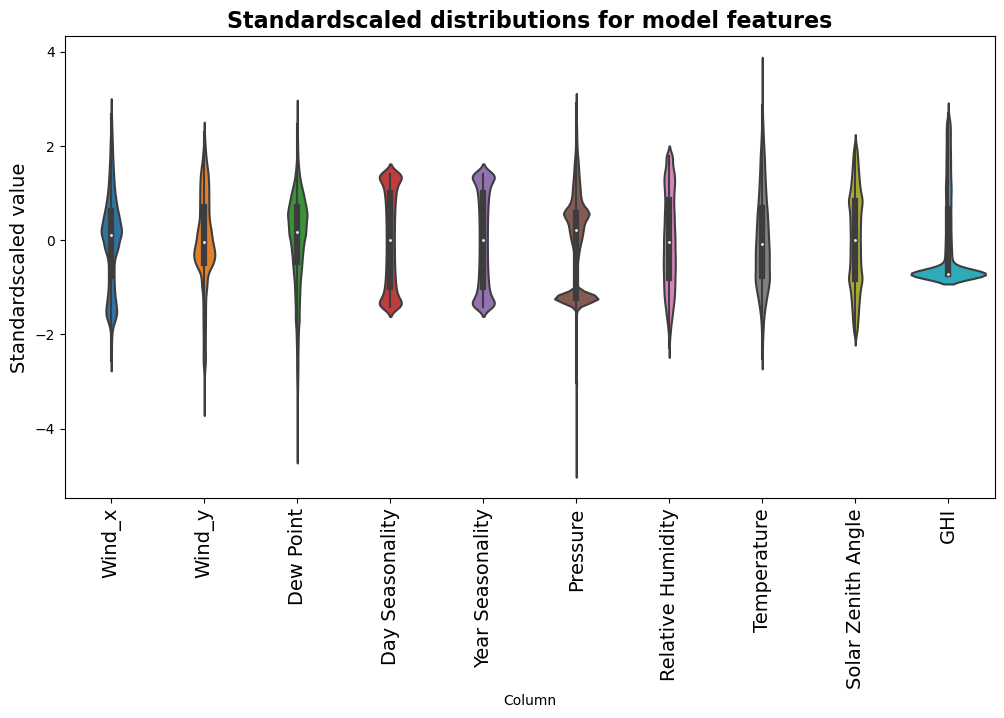

In [65]:
df_plot = (df[numerical_features] - df_mean)/df_std
df_plot = df_plot.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_plot)
_ = ax.set_xticklabels(df[numerical_features].keys(), rotation=90, fontsize=14)
ax.set_ylabel('Standardscaled value', fontsize=14)
plt.title('Standardscaled distributions for model features', fontsize=16, fontweight='bold')
plt.savefig('../figures/features_violin.png')

Now let's write out a new dataframe with all the features we want to include in the model

In [30]:
features_to_include = ['Wind_x', 'Wind_y', 'Dew Point', 'Cloud Type', 'Day Seasonality', 'Year Seasonality', 'Pressure', \
                       'Relative Humidity', 'Temperature', 'Solar Zenith Angle', 'GHI']

df[features_to_include].to_csv('../data/NSRDB_to_model.csv')